## Theory
**K-Means** is the simplest and most fundemental clustering algorithm.

**Given:** $x_1,x_2,...,x_n$, Where $x \in I\!R^d$

**Output:** Clusters $C_1,C_2,...,C_n$, Where $C_i \in \{1,2,..K\}$

**Goal:** Partition data into K clusters(groups) where each cluster has similar data.


The goal is pretty clear. you have a bunch of data from which you may or may not know the generative distrubition. you want to learn the structure of the data in a such way simular data are grouped together.

## The algorithm
Notation:

- **C**: Vector of assignments. it shows which cluster each data point $x$ is assigned to.

- $\mu$: Vector of centroids. it defines a cluster.

From the data set **X**, randomly choose K unique data points and assign them to $\mu = (\mu_1,\mu_2,...,\mu_K)$ , $\mu_k \in I\!R^d$. for simplicity I suggested to choose K unique random data points. although this works, in practice there are more advanced technics not covered here that help to pick the right centroids.

Assign each data point $x_i$ to a cluster($C_i = j$ if $x_i$ is assigned to cluster j) such that $x_i$ is closer to $\mu_j$.

As usual we need to define an objective function that :
- tells us what are the best $C$ and $\mu$
- is easy to optimize

## The Objective function
The K-means objective function can be written as :
$C^\ast, \mu^\ast = argmin_{\substack{\mu,c}} \sum_{i=1}^{n} \sum_{k=1}^{K} 1\{c_i = k\}||x_i - \mu_k||^2$

**This can be read as:** we want to get values for $C and \mu$ that minimize the sum of euclidian distances between each data point and the centroid of the cluster to which it is assigned to. 

To make things more familiar, let's rewrite this in objective function in a familiar loss function notation.

$ L= \sum_{i=1}^{n} \sum_{k=1}^{K} 1\{c_i = k\}||x_i - \mu_k||^2$

Notice the following:
- The loss function penalizes the distance of $x_i$ to the centroid it’s assigned to by $c_i$.
- The objective function is non-convexe. this means we can't find the optimal $\mu^*$ and $C^*$.
- Since the indicator function return a discrete value between 0 and 1, we can't optimise the objective function by taking the derivative and set it to zero. we will need an algorithm that iterates between $\mu$ and $C$, optimise one while fixing the other and vice versa.

## Coordinate descent
Input: $x_1;... ; x_n$ where $x_i \in I\!R^d$. Randomly initialize $\mu = (\mu_1; ...; \mu_K)$.

Iterate back-and-forth between the following two steps:
1. Given $\mu$, find the best value $c_i \in \{1; ... ; K\}$ for i = 1; . . . ; n.
2. Given c, find the best vector $\mu_k \in I\!R^d$ for k = 1; ... ; K.

This can be understood like this: given that we've found a good value of $\mu$ there is a good corresponding value of $C$. now given that we found a better value of $C$, then there is a better value of $\mu$. we keep iterating until these two values are no longer changing or are changing in insignificant way.

Now that we understand the algorithm, lets go ahead and derive the values that minimise the loss function. recall that the loss function is $ L= \sum_{i=1}^{n} \sum_{k=1}^{K} 1\{c_i = k\}||x_i - \mu_k||^2$. we want to find the values of $\mu$ and $C$ that minimise this loss function.

Let's start by randomly initialising $\mu = (\mu_1;...;\mu_k)$

### Assignment step
Given $\mu$ above, updat $C=(c_1;...;c_n)$. let's rewrite the loss function by expanding each data point $x_i$ independently.

$L= \sum_{k=1}^{K} 1\{c_1 = k\}||x_1 - \mu_k||^2 +  ...  + \sum_{k=1}^{K} 1\{c_n = k\}||x_n - \mu_k||^2$

The above step sums up the distance of each data point to its centroid. the intituition behind this, is that if the data point is assigned to the right cluster, then the distance to the centroid to the cluster where it belongs must be the minimum possible compared to its distance to the rest of centroids. 

We can minimize $L$ with respect to each $c_i$ by minimizing each term above separately. The solution is to assign $x_i$ to the closest centroid.

$c_i = argmin_{\substack{k}} \sum_{k=1}^{K}||x_i - \mu_k||^2$

Because there are only $K$ options for each $c_i$, there are no derivatives. Simply calculate all the possible values for $c_i$ and pick the best (smallest) one.

### Update step
Given $c = (c_1; ... ; c_n)$, update $\mu = (\mu_1; ... ; \mu_K)$. For a given $c$, we can break $L$ into $K$ clusters defined by $c$ so that each $\mu_i$ is independent.

$L = \sum_{i=1}^{N} 1\{c_i = 1\}||x_i - \mu_1||^2 + ... + \sum_{i=1}^{N} 1\{c_i = K\}||x_i - \mu_k||^2$

**This can be interpreted like this:** In the assignment step, we minimized the loss by making sure each each data point $x_i$ is assigned to its closest centroid. in this step we want to make sure that the centroids are updated in a way that for each centroid,the sum of distances of all data points belonging to the cluster represented by the centroid is minimal. 

As before, we can optimise each k individually. let's $n_k = \sum_{i=1}^{N} 1\{c_i = K\}$ then $\mu_k = argmin_{\substack{\mu}} \sum_{i=1}^{N} 1\{c_i = 1\}||x_i - \mu||^2
\to \mu_k = \frac{1}{n_k} \sum_{i=1}^{N} x_i1\{c_i = K\}$

That is, $\mu_k$ is the mean of the data assigned to cluster k.

The $\mu_k$ was derived to be the mean of the data assigned to cluster k by taking the derivative with respect to $\mu$ and then equalize with zero. then solve for $\mu_k$. for more details watch [(ML 16.2) K-means clustering (part 2)](https://www.youtube.com/watch?v=4shfFAArxSc&list=PLD0F06AA0D2E8FFBA&index=115).

### In summary 
The K-means clustering algorithm is as follows:

**Given:** $x_1; ... ; x_n$ where each $x \in I\!R^d$

**Goal:** Minimize $ L= \sum_{i=1}^{n} \sum_{k=1}^{K} 1\{c_i = k\}||x_i - \mu_k||^2$

- Randomly initialize $\mu = (\mu_1; ... ; \mu_K)$.
- Iterate until $c$ and $\mu$ stop changing
    1. Update each $c_i$ : $c_i = argmin_{\substack{k}} \sum_{k=1}^{K}||x_i - \mu_k||^2$
    2. Update each $\mu_k$ : Set
        - $n_k = \sum_{i=1}^{N} 1\{c_i = K\}$
        - $\mu_k = \frac{1}{n_k} \sum_{i=1}^{N} x_i1\{c_i = K\}$



## Practice

In the next few cells we will apply the above theory into practice and show how easy it is to implement a k-means algorithm in pyhton. although we will derive everything from scratch, in practice there are already well optimised ***scikit-learn functions*** that you can use to get this done quickly. we will show the raw code to enhance the understanding of what you've just learned above.

In this tutorial we will use the Iris dataset. it is made of the following details:

1. Number of Instances: 150 (50 in each of three classes)

2. Number of Attributes: 4 numeric, predictive attributes and the class

3. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

4. Missing Attribute Values: None

For this dataset we already know the labels. however we will trim the labels column and use the remaining of the attributes to categorise the data into three clusters. again we are using the prior knowledge that there are 3 classes of data. in real life you may not know much about the data and you have to find the number $K$ of clusters via different approaches such us looking at the relative decrease in $L$. If $K^$ is best, then increasing $K$
when $K \leq K^*$ should decrease $L$ much more than when $K > K^*$. 


In [1]:
from scipy.stats import multivariate_normal
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

The dataset used in this tutorial can be downloaded from [ICS UCI university](https://archive.ics.uci.edu/ml/datasets/iris) or you can use sklearn. see an example [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [2]:
#data_path = "./iris.data"
iris = datasets.load_iris()
column_names = ["sepal_length","sepal_width","petal_length","petal_width","label"]
iris_data = iris.data
iris_target = np.reshape(iris.target,(-1,1))

concat_iris_data = np.concatenate((iris_data, iris_target), axis=1)
df = pd.DataFrame(concat_iris_data, columns = column_names)

In [3]:
#show random 5 samples
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,label
138,6.0,3.0,4.8,1.8,2.0
65,6.7,3.1,4.4,1.4,1.0
108,6.7,2.5,5.8,1.8,2.0
102,7.1,3.0,5.9,2.1,2.0
86,6.7,3.1,4.7,1.5,1.0


Although the purpose of this tutorial is not to analyse the data, let's have a quick look at the some stats of the distribution. df.describe().T will be handy

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
label,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


The Iris dataset is a very simple dataset. it has only 4 dimensions to analyse. let's plot this data and color them according to the label they belong to. However, we can't plot all the 4 dimensions at time. and choosing two and ignore other would still not perfectly representing the distribution. let's use a technique called PCA (Principle Component Analysis) to project the 4 dimensions into 2. the reduced-dimensions data points will not be used to train the cluster, However, it will be handy to show how the cluster chose the centroids and how close the cluster are to the ground truth labels.

In [5]:
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

#Project data to lower dimension using PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

#create a dataframe combining the low dimension data and to be used for visualization
low_dim_data = {
        'X1': X[:,0],
        'X2': X[:,1],
        'label': y}
low_dim_df = pd.DataFrame(low_dim_data, columns = ['X1', 'X2', 'label'])

In [6]:
low_dim_df.sample(5)

,X1,X2,label
133,1.444161,-0.143413,2.0
90,0.464800,-0.670712,1.0
19,-2.587986,0.513560,0.0
105,3.397039,0.550837,2.0
51,0.932489,0.318334,1.0


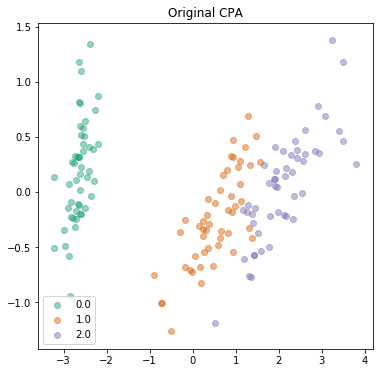

In [7]:
# Create Figure
fig, (axs) = plt.subplots(1,1, figsize = (6,6))

# Plot each group in each dataset as unique olor
for ax, low_dim_df in zip([axs], [low_dim_df]):
    ax.set_title('Original CPA')
    for cat, col in zip(low_dim_df['label'].unique(), ['#1b9e77', '#d95f02', '#7570b3']):
        ax.scatter(low_dim_df[low_dim_df.label == cat].X1, low_dim_df[low_dim_df.label == cat].X2, c = col, label = cat, alpha = .45)
    ax.legend()

Let's first initialise centroids. Each centroid w ill be defined by an $(x_1,x_2,x_3,x_4)$ of coordinates. 
To initialize the clusters, a K-means++ type algorithm will be used.
K-means++ picks one point from the data to be the first cluster center. Subsequent cluster centers are picked from the remaining "unpicked" points. However, the probability of picking any one point is proportional to the euclidean distance from that point to the nearest cluster center squared.

In [8]:
# Implement K-means ++ to initialize centers
def pick_cluster_centers(points, num_clusters = 3):
    # Create List to store clusters
    clusters = []
    # Save list of cluster indicies
    arr_idx = np.arange(len(points))
    # Choose first cluster; append to list
    clusters.append( points[np.random.choice(arr_idx)])
    # Define function to calculate squared distance
    def dist_sq(x): return np.linalg.norm(x)**2
    c_dist = None
    # Add Clusters until reaching "num_clusters"
    while len(clusters) < num_clusters:
        # Calculate distance between latest cluster and rest of points
        new_dist = np.apply_along_axis(dist_sq, 1, points - clusters[-1]).reshape(-1,1)
        
        # Add to distance array - First check to see if distance matrix exists
        if type(c_dist) == type(None):
            c_dist = new_dist
        else:
            c_dist = np.concatenate([c_dist, new_dist], axis = 1)
            
        # Calculate probability by finding shortest distance, then normalizing
        c_prob = np.apply_along_axis(np.min, 1, c_dist)
        c_prob = c_prob / c_prob.sum()
        # Draw new cluster according to probability
        clusters.append(points[np.random.choice(arr_idx, p = c_prob)])
    return np.array(clusters)

### Method of Describing Cluster Assignments
In hard clustering (k-means in this case), each point is assigned exclusively to one cluster. In other posts to come we will see soft clustering (soft k-means and GMM), where points may be portioned out between clusters. let's get back to k-means for now and do the assignment step.

For this assignment, allocation of points to clusters w ill be stored in a 2-d numpy array. Assume for the follow ing examples that there are three clusters.
If a point were assigned to cluster "0", its cluster assignment w ould be [1,0,0] . If there were four points, and three clusters, the cluster-matrix might be:
np.array([[1,0,0],[1,0,0],[0,1,0],[0,0,1]) In this case, the first two points are assigned to cluster "0" and the third point is assigned to cluster "1" and the last point is assigned to cluster 2.

In [9]:
def assign_clusters_k_means(points, clusters):
    """
    points: a 2-d numpy array where each row is a different point, and each
    column indicates the location of that point in that dimension
    clusters: a 2-d numpy array where each row is a different centroid cluster;
    each column indicates the location of that centroid in that dimension
    """
    # Define function to calculate squared distance
    def dist_sq(x): return np.linalg.norm(x)**2
    # Find distances between each point and each cluster
    dists_to_clust = np.concatenate([np.apply_along_axis(dist_sq, 1, points-c).reshape(-1,1) for c in clusters],axis = 1)
    # Function to convert minimum distance to 1 and others to 0
    def find_min(x):
        m = np.min(x)
        return [1 if n == m else 0 for n in x]
    # Apply function
    cluster_assignments = np.apply_along_axis( find_min, 1, dists_to_clust)
    return cluster_assignments

### Method of Describing Cluster update
The centroid for cluster $k$ ($\mu_k$) should be updated with the equation:  

$$\mu_k = \frac{\sum_ix_i\mathbb{1}\{c_i = k\}}{\sum_i\mathbb{1}\{c_i = k\}}$$

- $c_i$ indicates to which cluster point $i$ was assigned  
- Generally, the new centroids are the center (mean) of all points associated with the cluster

Each row of `cluster_weights` contains a single "1", otherwise filled with "0"s. e.g. if point $i$ is assigned to the first cluster (cluster "0"), the row corresponding to $i$ in `cluster_weights` will be [1,0,0]. 

In [10]:
def update_clusters_k_means(points, cluster_weights):
    """
    points: a 2-d numpy array where each row is a different point, and each
    column indicates the location of that point in that dimension
    cluster_weights: a 2-d numy array where each row corresponds to each row in "points"
    and the columns indicate which cluster the point "belongs" to - a "1" in the kth
    column indicates belonging to the kth cluster

    """
    # Create list to store new clusters
    new_clusts = []
    # For each column in "cluster_weights" which corresponds to a single cluster,
    # Average the location of all the points.
    for c in cluster_weights.T:
        c_points = points.copy()[c==1,:]
        new_clusts.append(np.apply_along_axis(np.mean,0,c_points).reshape(1,-1))
    # Convert cluster list to np.array
    new_clusts = np.concatenate(new_clusts)
    return new_clusts

### Run our clustering algorithm and compare with sklearn

With the cluster assignment and centroid updating functions defined, we can now test the clustering functionality on our iris dataset.  

In the cells below, a number of functions are defined.  

- Create meta-function which can combine the "assign" and "update" functions into a coherent clustering algorithm with stopping thresholds
- Create k-means function
- Create plotting function to compare `sklearn` and custom k-means algorithms  
    - The assignment of initial clusters will be determined by the `pick_cluster_centers` function defined above, with centers passed explicitly to the custom algorithm and `sklearn` algorithm. 

In [11]:
# Create function that will create clustering functions
def create_cluster_func(assign_func, update_func, threshold_func, assign_args = {}):
    
    def cluster(points, centroids, max_iter = 100, stop_threshold = .0001):
        for i in range(max_iter):
            old_centroids = centroids
            
            cluster_weights = assign_func(points, centroids, **assign_args)
            centroids = update_func(points, cluster_weights)
            
            if threshold_func(centroids, old_centroids, stop_threshold):
                break
        
        return (centroids,cluster_weights)
    return cluster

# Create functions that test for convergence
def basic_threshold_test(centroids, old_centroids, stop_threshold):
    
    for n, o in zip(centroids, old_centroids):
        #print(n,o)
        if np.linalg.norm(n-o) > stop_threshold:
            return False
    return True

In [12]:
### Creating actual functions for clustering
cluster_k_means = create_cluster_func(assign_clusters_k_means,
                                      update_clusters_k_means,
                                      basic_threshold_test)

Let's now create a function to run the clustering algorithms for both the custom functions we just defined above and the sklearn model. the function will then plot the results by comparing our custom model and the sklearn model. beside that the function will plot the original PCA data and the PCA data labeled by the custom model.

In [13]:
# Visualization function for k-means
from sklearn.cluster import  KMeans


def plot_k_means(df,low_dim_df,clusters = 3):
    
    """ 
    This function will call the cluster_k_means function to run the clustering models. we will compare our custom k-means algorithm with sklearn one. the purpose is to show 
    how the our custom k-means algorithm performs same as the sklearn k-means. but also this gives you the opportunity to learn how to use sklearn library which in practice
    you would use instead of writing your own algorithm.
    
    we will have two sections. 
    
    Section 1: we will run the algorithm against the original iris data. this will generate labels that are assigned to each data point and
    cluster centroids. 
    
    Section 2: Using the predicted labels for the original iris data, we will calculate the centroids for the projected low dimension data points used
    solely for the purpose of plotting the data in two dimensions. this section is optional for the k-means algorithm but for the sake of presenting exactly how the centroids
    were chosen, we decided to use a low dimension data for plotting.
    """
    # Create figure
    fig, (axs) = plt.subplots(1,2, figsize = (12,6))
    
    # Go thorugh all data sets 
    for ax, df in zip([axs], [df]):
        
        #Section 1
        # Pull out point data
        points = df.iloc[:,:4].values
        
        # Pick random initial centers
        init_cents = pick_cluster_centers(points, clusters)
        
        # Calculate centers from custom function
        cents,cluster_assignments = cluster_k_means(points ,init_cents)
        
        #Calculate centers from sklearn
        km = KMeans(n_clusters= clusters, init = init_cents, n_init=1).fit(points)
        cluster_assignments_sk = km.predict(points)
        
        #section 2
        
        #Calculate centers of the low dimension data projection
        low_dim_cents_custom = update_clusters_k_means(low_dim_df.iloc[:,:2].values, cluster_assignments)
        
        #predict labels and create a dataframe combining observed variables and predicted labels. this is need to plot the data distribution
        cluster_assignments = np.argmax(cluster_assignments,axis=1) #convert the matrix of clusters into a vector of indexes.
        cluster_assignments = np.reshape(cluster_assignments,(-1,1)) # reshape to the desired format
        
        predicted_low_dim_data = np.concatenate((low_dim_df.iloc[:,:2].values, cluster_assignments), axis=1)
        
        predicted_low_dim_df = pd.DataFrame(predicted_low_dim_data, columns = ['X1', 'X2', 'label'])
        
       
        #calculate centroids for low dimension when labeling was done by sklearn Kmeans
        #first convert km_cluster_assignments to the 2d array format used in this tutoril [[1,0,0],[0,0,1]]
        
        def to_cluster_format(index):
            zeros_clust = np.array([0,0,0])
            zeros_clust[index:index+1] = 1
            
            return zeros_clust
            
        cluster_assignments_sk = np.array([to_cluster_format(clust) for clust in cluster_assignments_sk]).reshape(-1,clusters)# format the array returned by sklearn
        low_dim_cents_sk = update_clusters_k_means(low_dim_df.iloc[:,:2].values, cluster_assignments_sk)
        
        #calculate the actual centers of our kmeans clustering with sklearn
        cent_sk = km.cluster_centers_

        
        # Plot each distribution in different color
        for ax, idx_df,title in zip(axs.flatten(), [low_dim_df,predicted_low_dim_df],['Original CPA','Cluster Labeled CPA']):
            ax.set_title(title)
            for cat, col in zip(idx_df['label'].unique(), ['#1b9e77', '#d95f02', '#7570b3']):
                ax.scatter(idx_df[idx_df.label == cat].X1, idx_df[idx_df.label == cat].X2, 
                           label = None, c = col, alpha = .45)
            
        # Plot Calculated centers
        ax.scatter(low_dim_cents_custom[:,0], low_dim_cents_custom[:,1], c = 'k', marker = 'x', label = 'Custom', s = 70)
        ax.scatter(low_dim_cents_sk[:,0], low_dim_cents_sk[:,1], c = 'r', marker = '+', label = 'sklearn', s = 70)
        
        # Add legend
        ax.legend()

CPU times: user 178 ms, sys: 6.68 ms, total: 184 ms
Wall time: 316 ms


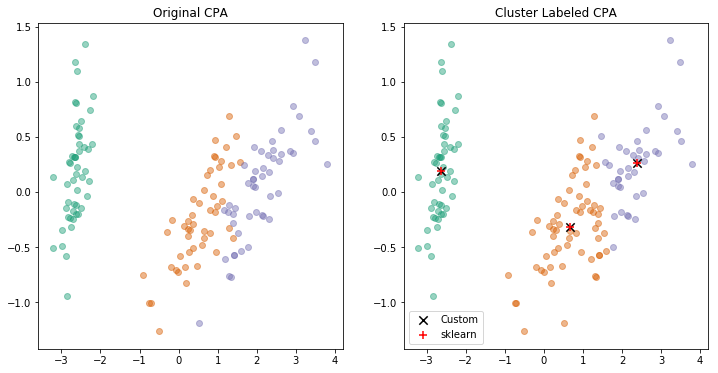

In [14]:
%%time
plot_k_means(df,low_dim_df,3)

As you can see, our custom K-mean model has done a very good job. observing the colort between the two plots, the difference is hard to notice. also notice how centroids for our custom k-means and centroids for sklearn k-means are same. this is the proof that the k-mean algorithm is a very straight algorithm and easy to implement.

**Note**: K-means algorithm can easily get stuck in the local minimul depending on how the initialisation was done. usually you need to run multiple iteration to confirm which centroids work better. also the choice of colors used here does not have to be in the same order on both plots.

### Summary
In this tutorial we've covered some of the mathematical logic behind K-means. we've seen that K-meas is a very simple algorithm and easy to implement. in real life, you will spend most of the time identifying the right K number of clusters for your dataset. we have not covered technics on how to do this.

In a nutshell, K-means is hard clustering algorithm in a sense that each data point is assigned to a cluster without any sort of uncertainty. in the upcoming tutorials we will cover a way of assigning clusters using weights so that if the data belong in the proximity of two centroids, it is partly assigned to both of them. we will even touch a much better way of dealing with uncertainty using a probabilistic approach using Gaussian Mixture Models with EM MLE(Expectation Maximisation , type of Maximum Likelihood Estimation).

I hope you enjoyed the tutorial.

## Recognition:

I would like to thank  [Prof John W. Paisley](https://www.ee.columbia.edu/john-w-paisley) and [mathematicalmonk channel](https://www.youtube.com/channel/UCcAtD_VYwcYwVbTdvArsm7w) withoum whom I could not easily derive the mathematical formula behind K-means algorithm. a big thanks to Emeritus institute of management from whom I got most of the code used in this tutorial. your contribution to the wide spread of AI and ML is much appreciated.